In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Skyserver.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df.shape

(10000, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [6]:
round(df.describe(), 2)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,1.000000e+04,10000.00,10000.00,10000.00,10000.00
mean,1.237650e+18,175.53,14.84,18.62,17.37,16.84,16.58,16.42,981.03,301.0,3.65,302.38,1.645022e+18,0.14,1460.99,52943.53,353.07
std,1.577039e+05,47.78,25.21,0.83,0.95,1.07,1.14,1.20,273.31,0.0,1.67,162.58,2.013998e+18,0.39,1788.78,1511.15,206.30
min,1.237650e+18,8.24,-5.38,12.99,12.80,12.43,11.95,11.61,308.00,301.0,1.00,11.00,2.995780e+17,-0.00,266.00,51578.00,1.00
25%,1.237650e+18,157.37,-0.54,18.18,16.82,16.17,15.85,15.62,752.00,301.0,2.00,184.00,3.389248e+17,0.00,301.00,51900.00,186.75
50%,1.237650e+18,180.39,0.40,18.85,17.50,16.86,16.55,16.39,756.00,301.0,4.00,299.00,4.966580e+17,0.04,441.00,51997.00,351.00
75%,1.237650e+18,201.55,35.65,19.26,18.01,17.51,17.26,17.14,1331.00,301.0,5.00,414.00,2.881300e+18,0.09,2559.00,54468.00,510.00
max,1.237650e+18,260.88,68.54,19.60,19.92,24.80,28.18,22.83,1412.00,301.0,6.00,768.00,9.468830e+18,5.35,8410.00,57481.00,1000.00


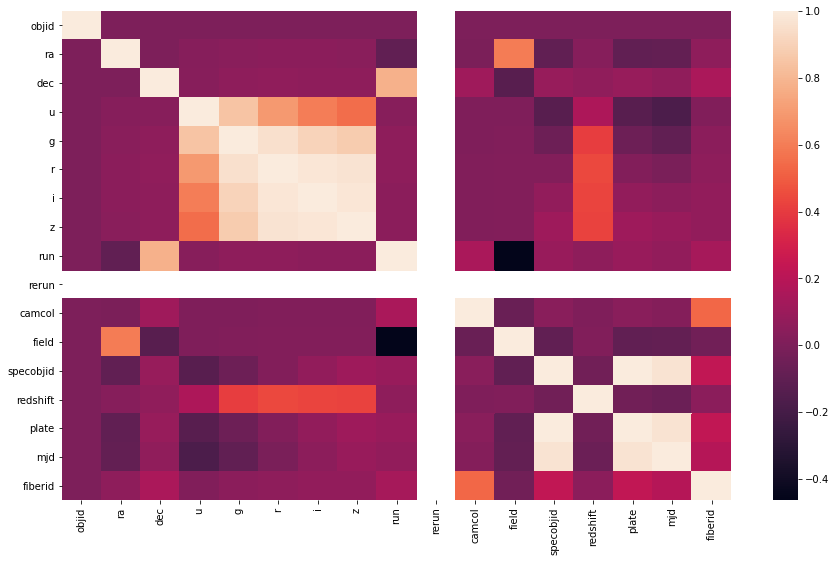

In [7]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr())

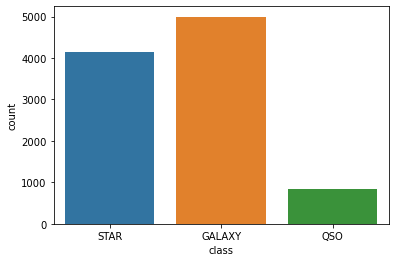

In [8]:
sns.countplot(df['class'])

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [10]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [11]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229


In [12]:
from scipy.stats import zscore

In [13]:
z = np.abs(zscore(df))
threshold=3
new_df = df[(z < 3).all(axis =1)]

In [14]:
df.shape

(10000, 18)

In [15]:
new_df.shape

(0, 18)

In [16]:
df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [17]:
# Dropping unwanted cols
df.drop(["objid",'specobjid','run','rerun','camcol','field'],inplace=True,axis=1)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590,3306,54922,512


In [18]:
df.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

In [19]:
X = df.drop('class', axis=1)
y = df['class']

In [20]:
X.shape

(10000, 11)

In [21]:
y.shape

(10000,)

In [22]:
y = y.values.reshape(-1,1)

In [23]:
y.shape

(10000, 1)

In [24]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.995342,-0.369731,1.031489,1.309311,0.668632
1,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.026043,-0.369849,-0.636213,-0.879197,0.911012
2,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,0.314528,-0.053027,-0.656339,-0.609191,0.775279
3,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.430921,-0.369993,1.031489,1.309311,0.760736
4,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,0.158276,-0.368189,1.031489,1.309311,0.770431
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.925337,1.455852,0.239453,0.104292,0.069416,0.087121,0.068876,-0.298756,-0.566888,-0.705811,-0.519029
9996,-0.925553,1.461079,-0.418536,0.070402,0.220993,0.116515,0.229516,-0.066761,-0.566888,-0.705811,-0.606286
9997,-0.920395,1.460907,0.167538,0.429347,0.634775,0.743983,0.829211,-0.370741,3.266087,2.693094,1.303667
9998,-0.921973,1.464321,0.318018,0.569857,0.646764,0.682516,0.595986,-0.333647,-0.566888,-0.705811,-0.601438


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .22, random_state = 43)

In [27]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc.score(X_train, y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.9686363636363636
[[1081    1   36]
 [  13  157    0]
 [  19    0  893]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1118
           1       0.99      0.92      0.96       170
           2       0.96      0.98      0.97       912

    accuracy                           0.97      2200
   macro avg       0.98      0.96      0.97      2200
weighted avg       0.97      0.97      0.97      2200



In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)
preddtc = dtc.predict(X_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.9863636363636363
[[1108   10    0]
 [  15  155    0]
 [   5    0  907]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1118
           1       0.94      0.91      0.93       170
           2       1.00      0.99      1.00       912

    accuracy                           0.99      2200
   macro avg       0.97      0.97      0.97      2200
weighted avg       0.99      0.99      0.99      2200



In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
predknn = knn.predict(X_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.9186363636363636
[[1063    2   53]
 [  22  147    1]
 [  99    2  811]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1118
           1       0.97      0.86      0.92       170
           2       0.94      0.89      0.91       912

    accuracy                           0.92      2200
   macro avg       0.94      0.90      0.92      2200
weighted avg       0.92      0.92      0.92      2200



In [30]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
svc.score(X_train, y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.9268181818181818
[[1098    1   19]
 [  19  151    0]
 [ 122    0  790]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1118
           1       0.99      0.89      0.94       170
           2       0.98      0.87      0.92       912

    accuracy                           0.93      2200
   macro avg       0.95      0.91      0.93      2200
weighted avg       0.93      0.93      0.93      2200



In [31]:
import joblib
joblib.dump(dtc, 'space_objects.pkl')


['space_objects.pkl']